In [1]:
import numpy as np
import pandas as pd


In [2]:
x1 = np.random.randint(100,size=(20))
x2 = np.random.randint(100,size=(20))
x3 = np.random.randint(100,size=(20))


y1 = 2*x1 + 3*x2 + 4*x3 + np.random.normal(1,1)

y2 = 7*x1 - 2*x2 + x3

In [3]:
XX1 =  {'col1': x1, 'col2': x2, 'col3': x3}
XX1 = pd.DataFrame(data= XX1)
XX1_numpy = XX1.to_numpy()

YY1 = {'col1': y1 }
YY1 = pd.DataFrame(data= YY1)
YY1_numpy = YY1.to_numpy()

YY2 = {'col1': y2 }
YY2 = pd.DataFrame(data= YY2)

In [4]:
YY2

,col1
0,505
1,373
2,543
3,245
4,418
5,562
6,-41
7,62
8,-51
9,-48


In [5]:
input = XX1

In [6]:
weights_size = len(input.iloc[0])
solutions_per_problem = 10

pop_size = (solutions_per_problem, weights_size)
new_population = np.random.randint(low = 1, high= 5, size = pop_size)

pop_original = new_population

In [7]:
new_population

array([[1, 3, 2],
       [1, 4, 1],
       [2, 3, 1],
       [1, 1, 4],
       [1, 4, 3],
       [4, 2, 4],
       [2, 4, 4],
       [4, 3, 4],
       [3, 1, 4],
       [4, 1, 2]])

In [8]:
# fitness of each population:

fitness = np.empty(new_population.shape[0])

def cal_pop_fitness(target_dataframe, electricity_values, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calculates the sum of products between each input and its corresponding weight.
    generated_electricity = np.sum(pop*electricity_values, axis=1);
    required_electricity =  target_dataframe['col1']
    error = required_electricity - generated_electricity
    error = error.abs()
    error = error.sum()
    fitness = 1/error
    
    return fitness


for i in range(len(new_population)):
    fitness[i] = cal_pop_fitness(YY1, XX1, new_population[i])

fitness

array([0.00036839, 0.00036607, 0.00038248, 0.00034476, 0.00088518,
       0.00073845, 0.00106556, 0.00052343, 0.00077709, 0.00047579])

In [9]:
np.max(fitness)

0.0010655648264444749

In [10]:
new_population

array([[1, 3, 2],
       [1, 4, 1],
       [2, 3, 1],
       [1, 1, 4],
       [1, 4, 3],
       [4, 2, 4],
       [2, 4, 4],
       [4, 3, 4],
       [3, 1, 4],
       [4, 1, 2]])

In [11]:
# Select the best parents for mating process:

def select_mating_pool(pop, fitness, number_of_parents):
    parents = np.empty((number_of_parents, new_population.shape[1]))

    for instance in range(number_of_parents):
        max_index = np.where(fitness == np.max(fitness))
        max_index = max_index[0][0]
        parents[instance, :] = pop[max_index, :]
        fitness[max_index] = -9999

    return parents

In [12]:
max_index = np.where(fitness == np.max(fitness))
max_index = max_index[0][0]
max_index

6

In [13]:
# Select the best parents for mating process:

def pseudo_select_mating_pool(pop, fitness, number_of_parents):
    parents = np.empty((number_of_parents, new_population.shape[1]))

    for instance in range(number_of_parents):
        max_index = np.where(fitness == np.max(fitness))
        max_index = max_index[0][0]
        parents[instance, :] = pop[instance, :]
        fitness[max_index] = -9999

    return fitness



In [14]:
fitness

array([0.00036839, 0.00036607, 0.00038248, 0.00034476, 0.00088518,
       0.00073845, 0.00106556, 0.00052343, 0.00077709, 0.00047579])

In [15]:
# The mating process with each parent

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)
 
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [16]:
# Mutations on the offsprings:

def mutation(offspring_crossover):
    
    offspring_operated = offspring_crossover

    # Mutation changes a single gene in each offspring randomly.

    for idx in range(offspring_operated.shape[0]):

        # The random value to be added to the gene.

        random_value = np.random.randint(low = -1, high= 1)

        offspring_operated[idx, 1] = offspring_operated[idx, 1] + random_value

    return offspring_operated

In [17]:
test_mating_pool = select_mating_pool(new_population, fitness, 4)

test_mating_pool

array([[2., 4., 4.],
       [1., 4., 3.],
       [3., 1., 4.],
       [4., 2., 4.]])

In [18]:
fitness

array([ 3.68387818e-04,  3.66069950e-04,  3.82477836e-04,  3.44764508e-04,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,  5.23431567e-04,
       -9.99900000e+03,  4.75790519e-04])

In [19]:
crossover_pop = crossover(test_mating_pool, offspring_size=(pop_size[0]- test_mating_pool.shape[0], weights_size))
crossover_pop 

array([[2., 4., 3.],
       [1., 1., 4.],
       [3., 2., 4.],
       [4., 4., 4.],
       [2., 4., 3.],
       [1., 1., 4.]])

In [20]:
new_population[0:test_mating_pool.shape[0], :] = test_mating_pool
new_population[test_mating_pool.shape[0]:, :] = crossover_pop 
new_population

array([[2, 4, 4],
       [1, 4, 3],
       [3, 1, 4],
       [4, 2, 4],
       [2, 4, 3],
       [1, 1, 4],
       [3, 2, 4],
       [4, 4, 4],
       [2, 4, 3],
       [1, 1, 4]])

https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6 

Fitness
[0.00106556 0.00088518 0.00077709 0.00073845 0.00136054 0.00034476
 0.00148148 0.00034862 0.00136054 0.00034476]
Parents
[[3. 2. 4.]
 [2. 4. 3.]
 [2. 4. 3.]
 [2. 4. 4.]]
offspring_crossover
[[3. 4. 3.]
 [2. 4. 3.]
 [2. 4. 4.]
 [2. 2. 4.]
 [3. 4. 3.]
 [2. 4. 3.]]
Fitness
[0.00148148 0.00136054 0.00136054 0.00106556 0.00071722 0.00136054
 0.05120174 0.00051665 0.00071722 0.00113054]
Parents
[[2. 3. 4.]
 [3. 2. 4.]
 [2. 4. 3.]
 [2. 4. 3.]]
offspring_crossover
[[2. 2. 4.]
 [3. 4. 3.]
 [2. 4. 3.]
 [2. 3. 4.]
 [2. 2. 4.]
 [3. 4. 3.]]
Fitness
[0.05120174 0.00148148 0.00136054 0.00136054 0.00051665 0.00129854
 0.00113054 0.00102299 0.00051665 0.00129854]
Parents
[[2. 3. 4.]
 [3. 2. 4.]
 [2. 4. 3.]
 [2. 4. 3.]]
offspring_crossover
[[2. 2. 4.]
 [3. 4. 3.]
 [2. 4. 3.]
 [2. 3. 4.]
 [2. 2. 4.]
 [3. 4. 3.]]
Fitness
[0.05120174 0.00148148 0.00136054 0.00136054 0.00102299 0.00129854
 0.00136054 0.05120174 0.00102299 0.00129854]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [3. 2. 4.]
 [2. 4. 3.]]
offspring

Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.05120174 0.05120174
 0.00102299 0.00102299 0.00102299 0.05120174]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring_crossover
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.05120174 0.00102299
 0.00102299 0.00102299 0.05120174 0.05120174]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring_crossover
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.05120174 0.05120174
 0.00102299 0.05120174 0.00102299 0.00102299]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring_crossover
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.00102299 0.05120174
 0.00102299 0.05120174 0.00102299 0.00102299]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring

Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.00102299 0.05120174
 0.00102299 0.00102299 0.05120174 0.05120174]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring_crossover
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.05120174 0.05120174
 0.05120174 0.05120174 0.05120174 0.05120174]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring_crossover
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.00102299 0.05120174
 0.00102299 0.00102299 0.05120174 0.00102299]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring_crossover
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Fitness
[0.05120174 0.05120174 0.05120174 0.05120174 0.05120174 0.05120174
 0.05120174 0.00102299 0.00102299 0.05120174]
Parents
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
offspring

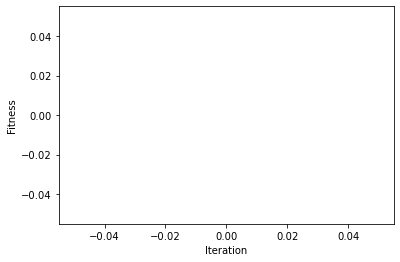

In [21]:
num_generations = 100

num_parents_mating = 4

fitness = np.empty(new_population.shape[0])

best_outputs = []

for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
        
    for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(YY1, XX1, new_population[i])
        
    print("Fitness")    
    print(fitness)   
    
    #best_outputs.append(np.max(np.sum(new_population*XX1, axis=1)))

    # The best result in the current iteration.
    #print("Best result : ", np.max(np.sum(new_population*XX1, axis=1)))
    
    # Selecting the best parents in the population for mating.
    
    parents = select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
    
    print("Parents")    
    print(parents)  
 
     # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], weights_size))
    
    print("offspring_crossover")    
    print(offspring_crossover)
 
     # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
# Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.


for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(YY1, XX1, new_population[i])
                
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [22]:
new_population

array([[2, 3, 4],
       [2, 3, 4],
       [2, 3, 4],
       [2, 3, 4],
       [2, 3, 4],
       [2, 2, 4],
       [2, 3, 4],
       [2, 3, 4],
       [2, 3, 4],
       [2, 2, 4]])

In [23]:
pop_size

(10, 3)

In [24]:
parents.shape[0]

4

In [25]:
fitness

array([0.05120174, 0.05120174, 0.05120174, 0.05120174, 0.05120174,
       0.00102299, 0.05120174, 0.05120174, 0.05120174, 0.00102299])

In [26]:
for instance in range(4):
    print(instance)

0
1
2
3
